<a href="https://colab.research.google.com/github/Folia412/Data_Analysis_2023/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from google.colab.patches import cv2_imshow
import cv2 as cv
from sklearn.cluster import KMeans
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def plot (comp):
  componentsDf = pd.DataFrame(data = comp, columns = ['principal component 1', 'principal component 2'])
  pcaDf = pd.concat([componentsDf, y], axis=1)

  plt.figure(figsize=(12, 6))
  sns.scatterplot(data=pcaDf, x="principal component 1", y="principal component 2", hue="Class")

In [ ]:
df = pd.read_csv("riceClassification.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
df.shape

(18185, 12)

In [ ]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)
y = df[['Class']]

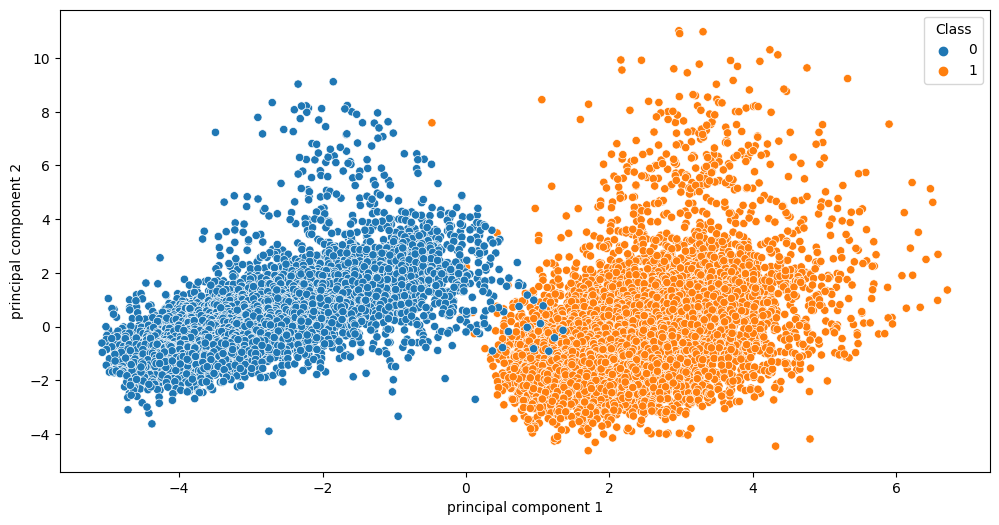

In [ ]:
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(scaled_df)
plot(pca_comp)

In [ ]:
print(pca.components_)

[[-0.26758367 -0.34540257 -0.13641396 -0.35456447  0.26395453 -0.34479155
  -0.34368387 -0.11702039 -0.26637037 -0.28206089  0.28454345  0.33604945]
 [-0.15086395 -0.15270442 -0.55461172  0.06722005 -0.37974563 -0.15609462
  -0.16406601  0.18479705 -0.39226628  0.34457461 -0.3543651  -0.11827825]]


In [ ]:
print(sum(pca.explained_variance_ratio_))

0.8688760411030834


In [ ]:
var_ratio = []
for num in range (0, 13):
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. variance')

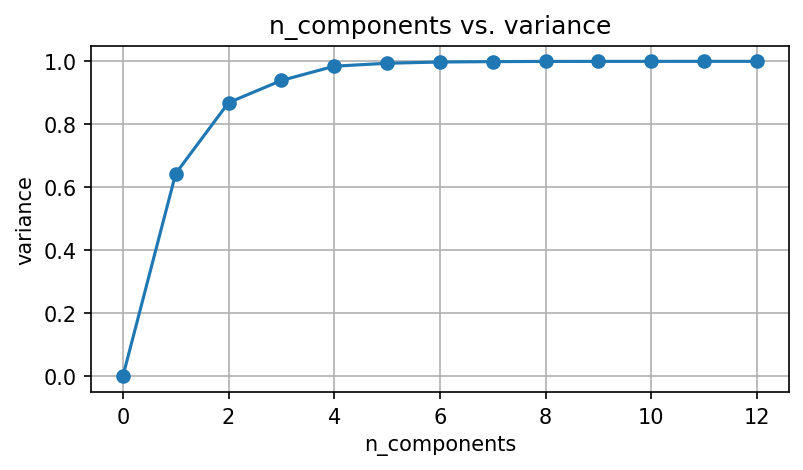

In [ ]:
plt.figure(figsize=(6,3),dpi=150)
plt.grid()
plt.plot(range(0, 13),var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('variance')
plt.title('n_components vs. variance')

1.5422024726867676


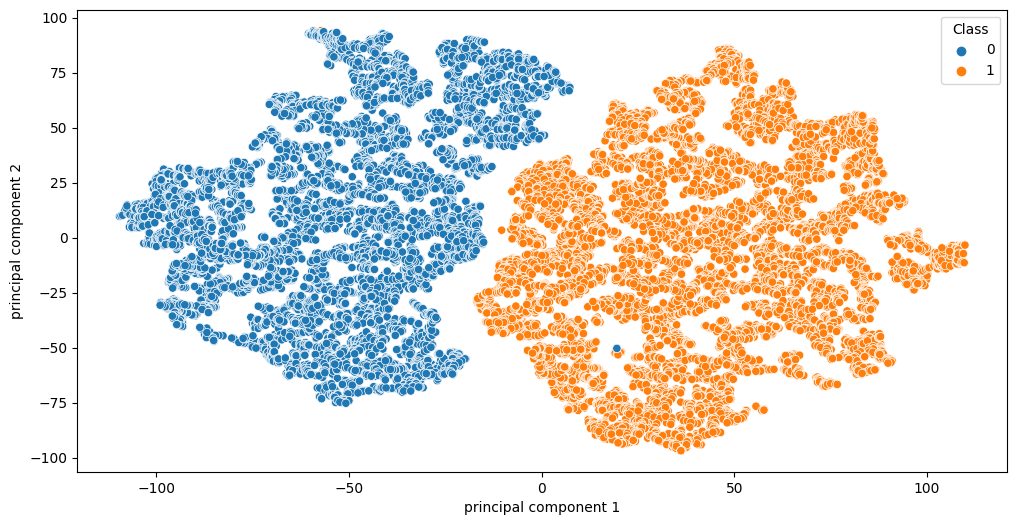

In [ ]:
tsne = TSNE(n_components=2)
tsne_comp = tsne.fit_transform(scaled_df)
print(tsne.kl_divergence_)
plot(tsne_comp)

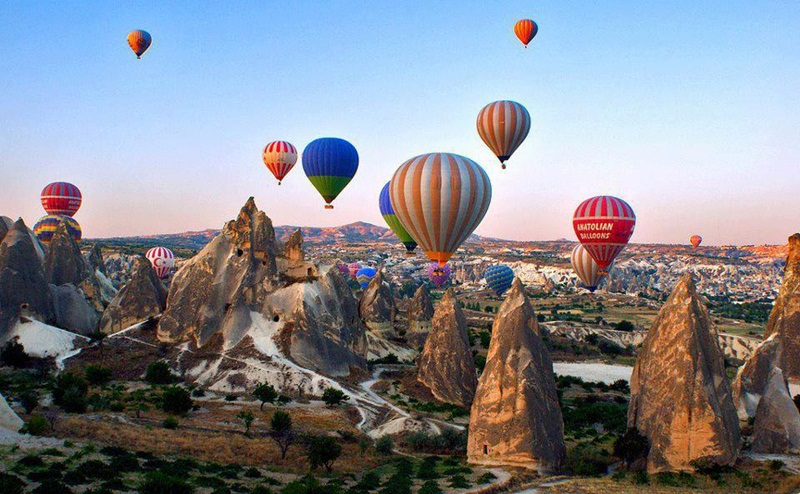

In [ ]:
img = cv.imread('balloons.jpg')
cv2_imshow(img)

In [ ]:
reshaped_image = np.reshape(img,((img.shape[0] * img.shape[1]), 3))
def imgquant(depth):
  model = KMeans(n_clusters=depth, n_init=10 )
  target = model.fit_predict(reshaped_image)
  color_space = model.cluster_centers_
  output_image = np.reshape(color_space.astype("uint8")[target], (img.shape[0], img.shape[1], 3))
  con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
  plt.imshow(con_image)
  plt.axis("off")

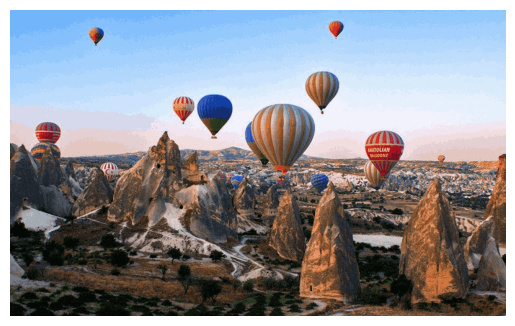

In [ ]:
imgquant(64)

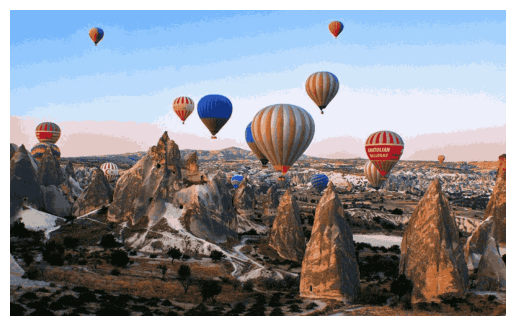

In [ ]:
imgquant(32)

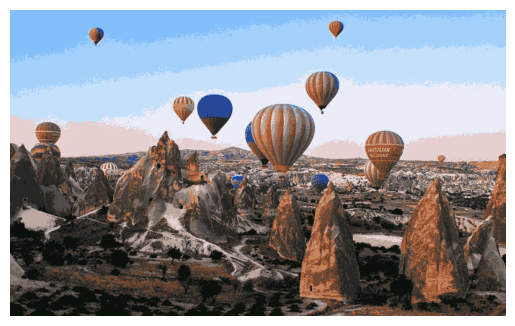

In [ ]:
imgquant(16)

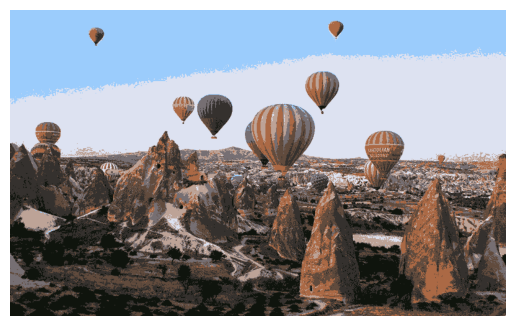

In [ ]:
imgquant(8)

In [ ]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df.columns

Index(['Review', 'Rating'], dtype='object')

In [ ]:
from collections import Counter
Counter( df['Rating'])

Counter({4: 6039, 2: 1793, 3: 2184, 5: 9054, 1: 1421})

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(df.at[6,'Review'])
for i in range (len(df)):
  text = df.at[i,'Review']
  text = text.lower()
  text = re.sub("@\S+", " ", text)
  text = re.sub("https*\S+", " ", text)
  text = re.sub("#\S+", " ", text)
  text = re.sub("\d", " ", text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub(' \w ', ' ', text)
  text = re.sub(' \w{2} ', ' ', text)
  text = re.sub('\s{2,}',' ', text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  df.at[i,'Review'] = text
print(df.at[6,'Review'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance come ride.we booked monte carlo suite proved comfortable longish stay, room 905 located street building, street noise not problem view interesting rooms building look dank alley midsection large office building, suite comfortable plenty room spread, bathroom attractive squeaky clean small comparison generous proportions sitting sleeping areas, lots comfortable seating options good lighting plenty storage clothing luggage, hotel staff friendly efficient, housekeeping staff did great job pleasant, requests responded quickly.the location quite good, easy walk pike street market seattle art museum notch shopping dining options.a positive experience,  
cozy stay rainy city husband spent nights monaco early january business trip chance come ride booked monte carlo suite proved comfortable longish stay room located street building street noise problem view interesting rooms building look dank alley mi

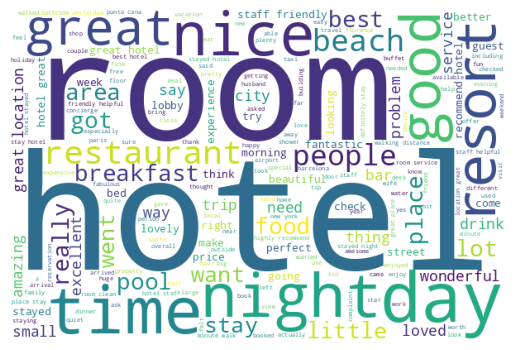

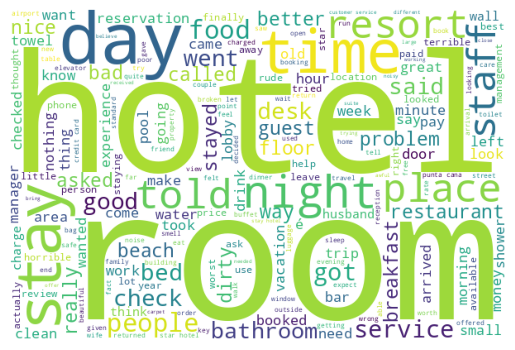

In [ ]:
def visualize(label):
    text = ''
    for msg in df[df['Rating'] == label]['Review']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize(5)
visualize(1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.20)

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['Review'])
x_train_Tfidf = Tfidf_vect.transform(x_train)
x_test_Tfidf = Tfidf_vect.transform(x_test)
print(x_test_Tfidf)

  (0, 4988)	0.18899432401445188
  (0, 4940)	0.15210845778514534
  (0, 4904)	0.11120838174714145
  (0, 4743)	0.1505971699381858
  (0, 4605)	0.08054794111257112
  (0, 4529)	0.1709949143643682
  (0, 4499)	0.09423919499482582
  (0, 4465)	0.099849486214196
  (0, 4464)	0.09858525661151388
  (0, 4320)	0.21044762965226582
  (0, 4139)	0.12047416077922518
  (0, 4135)	0.12178498187435335
  (0, 3814)	0.1199472525100474
  (0, 3680)	0.08524284789379727
  (0, 3243)	0.14810530931284513
  (0, 3173)	0.07666051981218716
  (0, 3133)	0.16354873038589798
  (0, 2624)	0.13922759730442402
  (0, 2580)	0.09124288258608534
  (0, 2537)	0.15275393743803833
  (0, 2522)	0.14980635194923397
  (0, 2389)	0.09806794406568169
  (0, 2371)	0.2297049428759123
  (0, 2342)	0.21623238538239298
  (0, 2156)	0.03612649447849107
  :	:
  (4098, 3511)	0.07395793114932256
  (4098, 3408)	0.12413098797302205
  (4098, 3299)	0.13051506566224838
  (4098, 3297)	0.12701320176582298
  (4098, 3296)	0.15860828420044143
  (4098, 3234)	0.07114666

In [ ]:
svc = SVC(C=1, gamma = 1, kernel = 'rbf')
svc.fit(x_train_Tfidf, y_train.ravel())
prediction = svc.predict(x_test_Tfidf)

In [ ]:
print(confusion_matrix(y_test,prediction))

[[ 172   93    4   10    8]
 [  44  158   38   81   27]
 [   4   55   95  228   50]
 [   1   19   25  668  547]
 [   2    3    3  283 1481]]


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.77      0.60      0.67       287
           2       0.48      0.45      0.47       348
           3       0.58      0.22      0.32       432
           4       0.53      0.53      0.53      1260
           5       0.70      0.84      0.76      1772

    accuracy                           0.63      4099
   macro avg       0.61      0.53      0.55      4099
weighted avg       0.62      0.63      0.61      4099

